In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("bike_sharing_daily.csv")
df = pd.DataFrame(data)

## **EDA**

In [14]:
df.drop(['instant'], axis = 1, inplace = True)

In [15]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [16]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,714.000000,707.000000,706.000000,718.000000,720.000000,720.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.497644,0.474674,0.628691,0.191136,848.102778,3658.512500,4505.255814
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.182952,0.162837,0.142652,0.077166,686.293614,1554.760481,1935.491354
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.341667,0.337842,0.522708,0.135111,314.750000,2499.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502989,0.482942,0.630000,0.181598,717.000000,3660.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.610803,0.731042,0.234156,1095.500000,4753.250000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- 결측치가 있는 것으로 추정되는 변수는 temp, atemp, humidity, windspeed, casual, registered이다.

- 전반적으로 평균과 표준편차가 크지 않은 편이지만, holiday나 weekday의 최솟값이 0인 점, 그리고 mnth와 weekday에서 다소 높은 표준편차가 나타나는 점을 보면, 이 변수들이 예상과 다른 의미를 가질 수도 있겠다는 생각이 든다.

- cnt는 해당 날에 공유자전거를 탄 사람들의 횟수가 아닐까 싶다.

- 마지막으로, casual과 registered 변수의 의미도 불분명하여, 이에 대해서도 더 알아볼 필요가 있다.

In [33]:
## weekday : 0~6이 반복되는 것으로 보아서, 월화수목금토일을 의미하는 것이 아닐까 싶다. 14개만 뽑아서 보겠다.
df['weekday'].loc[0:14] # 확인해본 결과 단순히 반복되므로, 월화수목금토일을 의미하는 게 맞는 것 같다.

## 같은 의미로, mnth도 월을 의미하는 게 아닐까?
df.loc[:, ['dteday', 'mnth']]
## 표준편차와 평균이 의미 X

,dteday,mnth
0,2011-01-01,1
1,2011-01-02,1
2,2011-01-03,1
3,2011-01-04,1
4,2011-01-05,1
...,...,...
726,2012-12-27,12
727,2012-12-28,12
728,2012-12-29,12
729,2012-12-30,12


In [23]:
## holiday -> 공휴일인지 아닌지를 알려주는 열이 아닐까 -> 왜냐하면 최솟값이 0, 최댓값이 1임.
df[df['holiday'] == df['holiday'].max()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117.0,883.0,1000
51,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195.0,912.0,1107
104,2011-04-15,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642.0,2484.0,3126
149,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549.0,2549.0,4098
184,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065.0,2978.0,6043
247,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236.0,2115.0,3351
282,2011-10-10,4,0,10,1,1,0,1,0.570833,NaN,0.733750,0.042304,1514.0,3603.0,5117
314,2011-11-11,4,0,11,1,5,0,1,0.324167,0.306817,0.446250,0.314675,440.0,2928.0,3368
327,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560.0,935.0,1495
359,2011-12-26,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430.0,887.0,1317


데이터프레임을 보다보니, casual 과 registered의 합이 cnt라는 생각이 들었다.

그렇다면, cnt는 해당 날의 총 대여수이고, casual은 비회원, registered는 회원이라고 생각하였다.

-> casual과 registered 사용자의 그룹에 따라
- 평균적으로 temp, atemp, windspeed 같은 환경 변수들이 어떤 특성을 보이는지 알고 싶다.

In [41]:
## casual을 기준으로
df['casual_bin'] = pd.cut(df['casual'], bins=5)
df.groupby('casual_bin')[['temp', 'atemp', 'windspeed']].mean()

## 날씨가 따뜻해질수록 casual 사용자가 증가하지만, 가장 사용자가 많을 때는 오히려 평균기온이 살짝 낮아지고, 바람이 살짝 많아졌다.
## 아주 추울 때 빼고는 비슷한 양상을 보이는 것 같음. -> 날짜와 연관이 되어있을 수 있다. (연휴 vs 주중 vs 주말)

<ipython-input-41-6c70ad633659>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('casual_bin')[['temp', 'atemp', 'windspeed']].mean()


,temp,atemp,windspeed
casual_bin,,,
"(-1.408, 683.6]",0.378897,0.369909,0.207593
"(683.6, 1365.2]",0.595904,0.564904,0.177695
"(1365.2, 2046.8]",0.630392,0.582594,0.174639
"(2046.8, 2728.4]",0.609094,0.577493,0.167677
"(2728.4, 3410.0]",0.596026,0.563039,0.179250


In [43]:
## registered를 기준으로
df['registered_bin'] = pd.cut(df['registered'], bins=5)
df.groupby('registered_bin')[['temp', 'atemp', 'windspeed']].mean()

## 날씨가 추울 때도 casual 사용자보단 많은 것으로 보아, 보유하고 있는 활성 유저가 많은 것으로 보인다.
## 아주 따뜻할 때가 제일 많은 것으로 보인다.

<ipython-input-43-bfbe91d44da0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('registered_bin')[['temp', 'atemp', 'windspeed']].mean()


,temp,atemp,windspeed
registered_bin,,,
"(13.074, 1405.2]",0.268438,0.272424,0.225118
"(1405.2, 2790.4]",0.380732,0.369543,0.214852
"(2790.4, 4175.6]",0.543094,0.514102,0.181942
"(4175.6, 5560.8]",0.530231,0.506719,0.188432
"(5560.8, 6946.0]",0.643835,0.601221,0.165407


정리해보자면,
- 따뜻해질수록 casual, registered 사용자는 증가
- 아주 추울 때만 제외하고는 기온/풍속 패턴이 비슷
-> 날짜(요일, 휴일 여부)의 영향이 높을 수 있다.

<ipython-input-46-8fc6aacc9521>:30: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-8fc6aacc9521>:30: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-8fc6aacc9521>:30: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-8fc6aacc9521>:30: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-8fc6aacc9521>:30: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-8fc6aacc9521>:30: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-8fc6aacc9521>:30: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyt

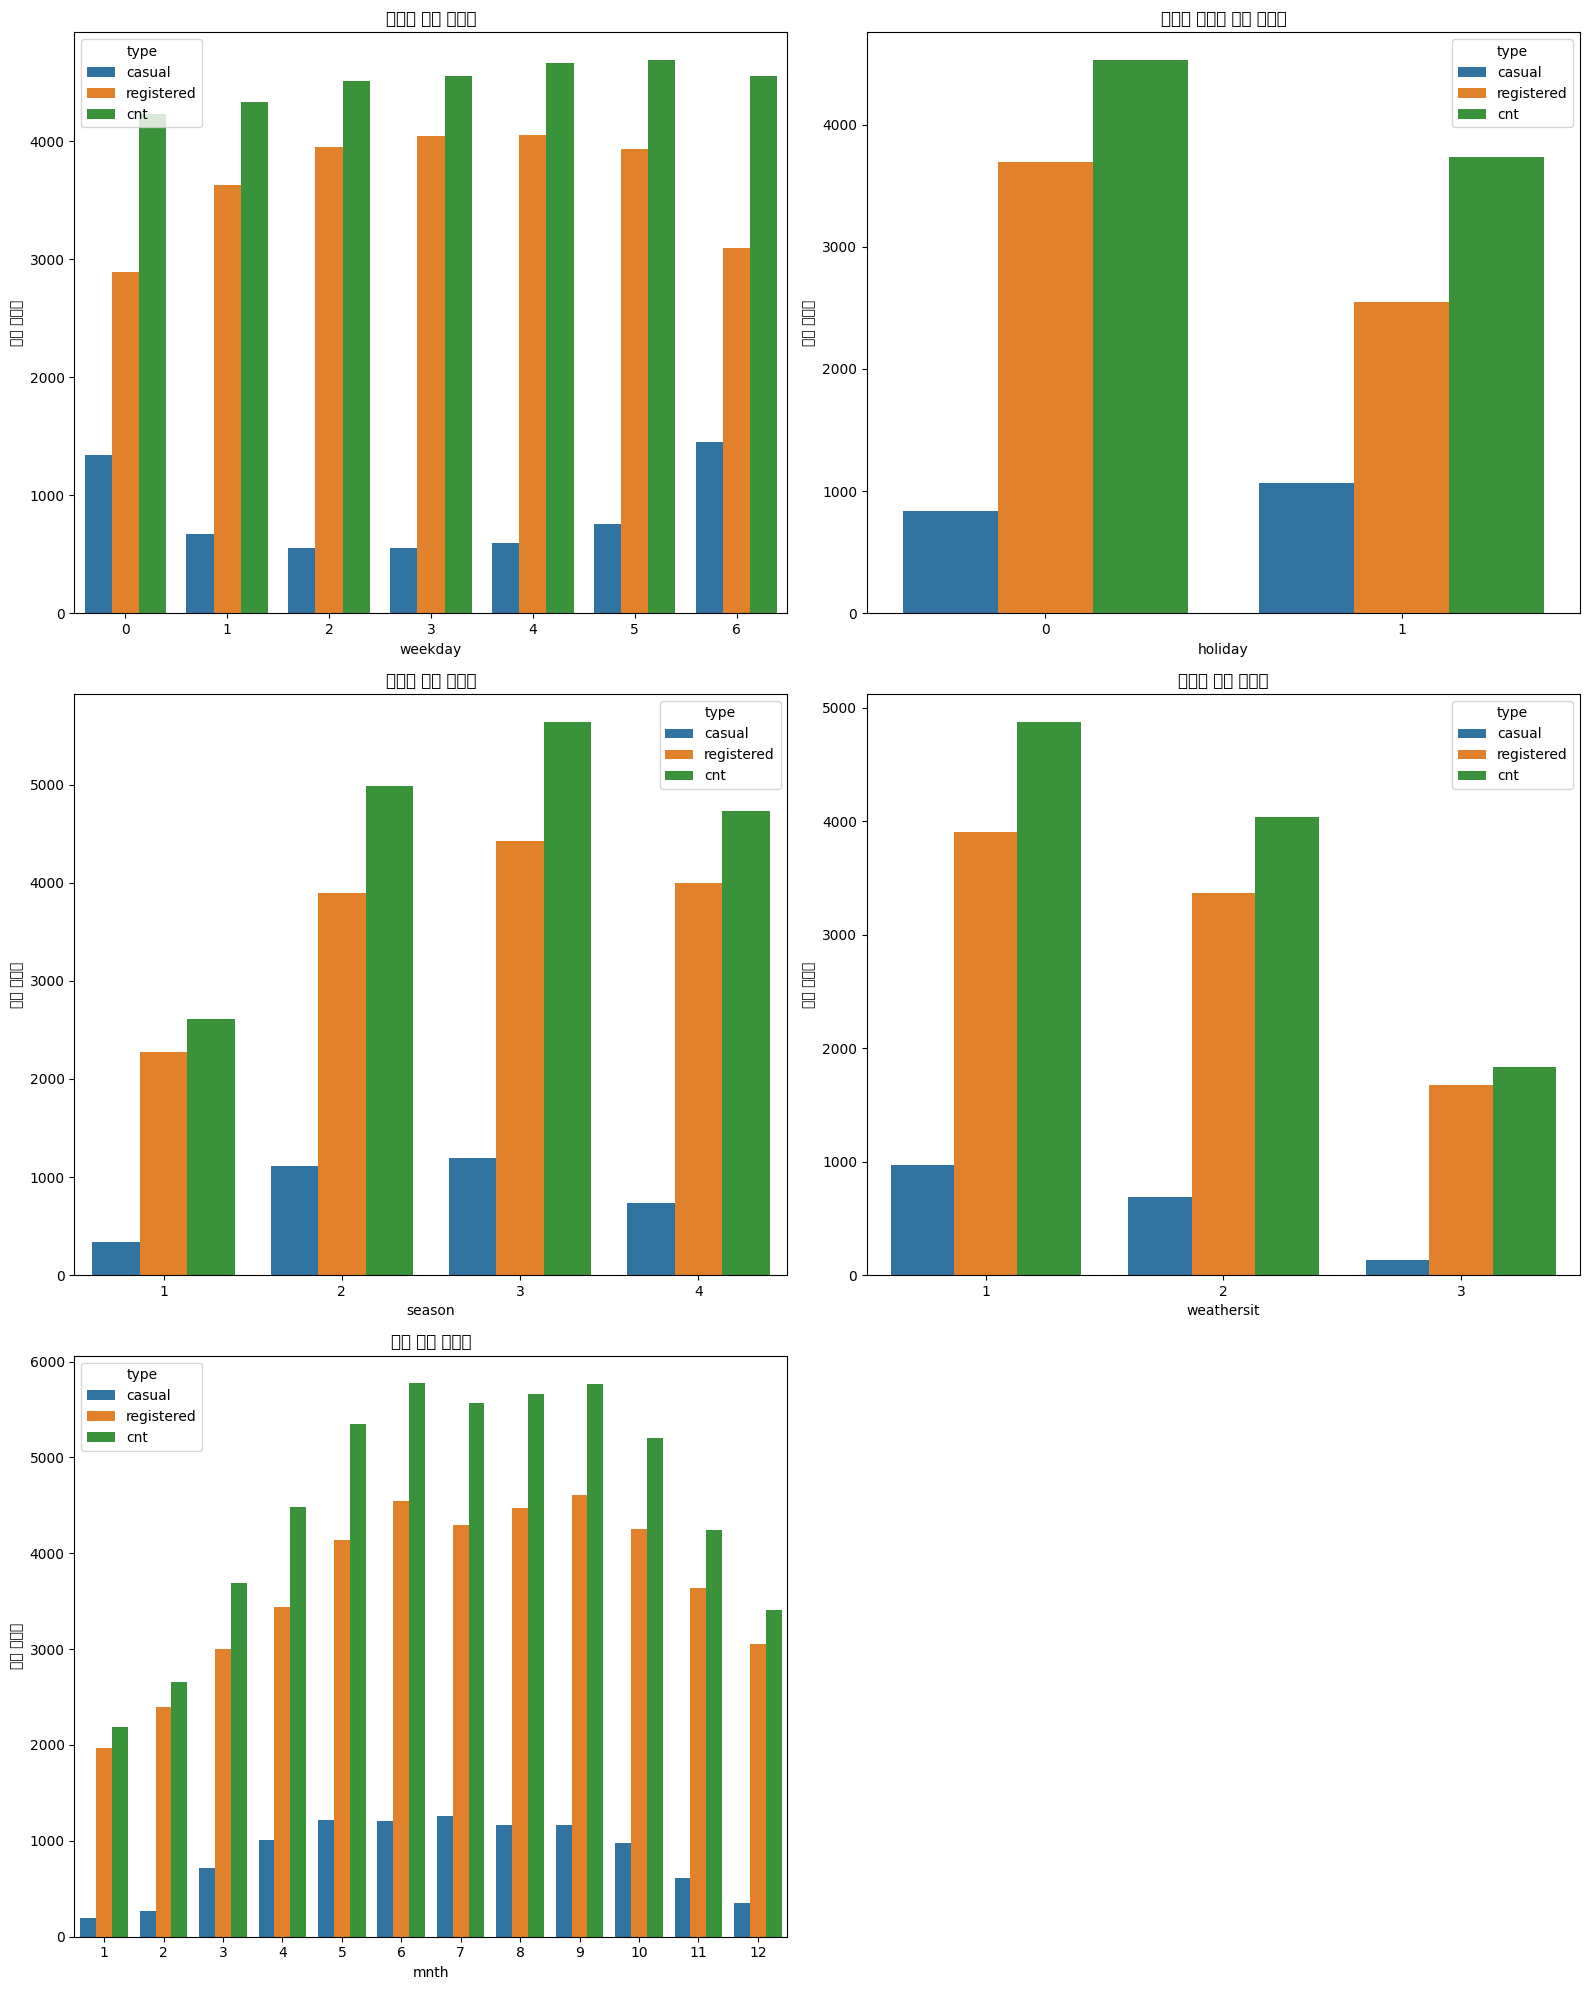

In [46]:
# df.groupby('weekday')[['casual', 'registered', 'cnt']].mean()
# df.groupby('holiday')[['casual', 'registered', 'cnt']].mean()
# df.groupby('season')[['casual', 'registered', 'cnt']].mean()
# df.groupby('weathersit')[['casual', 'registered', 'cnt']].mean()
# df.groupby('mnth')[['casual', 'registered', 'cnt']].mean()

## 시각화 해서 비교
group_keys = ['weekday', 'holiday', 'season', 'weathersit', 'mnth']
titles = {
    'weekday' : '요일별 평균 이용량',
    'holiday' : '공휴일 여부별 평균 이용량',
    'season' : '계절별 평균 이용량',
    'weathersit' : '날씨별 평균 이용량',
    'mnth' : '월별 평균 이용량'
}

plt.figure(figsize=(16, 20))

for i, key in enumerate(group_keys):
  plt.subplot(3, 2, i + 1)

  grouped_df = df.groupby(key)[['casual', 'registered', 'cnt']].mean().reset_index()
  melted = grouped_df.melt(id_vars = key, value_vars = ['casual', 'registered', 'cnt'], var_name='type', value_name = 'count')

  sns.barplot(x = key, y = 'count', hue = 'type', data=melted)
  plt.title(titles[key])
  plt.xlabel(key)
  plt.ylabel('평균 대여수')

plt.tight_layout()
plt.show()

위의 그래프에서 얻은 인사이트
- `weekday` 기준으로 볼 때, `casual`과 `registered` 사용자의 패턴이 반대되는 양상을 보인다.
  - 비회원 사용자는 주말에 주로 자전거를 이용하며, 이는 주말 나들이나 여가 목적으로 사용하는 경향을 보여준다.
  - 반면 회원 사용자는 주중에 사용량이 많으며, 출퇴근 용도로 활용하는 것으로 추정된다.

- `holiday`의 경우, 공휴일에는 회원 사용자가 상대적으로 줄어드는 경향이 있다.
  - 이는 평소에 출퇴근 등으로 자주 이용하는 회원들이 공휴일에는 자전거를 덜 이용하기 때문일 것이다.

- `season`을 기준으로 보면, 1이 겨울로 추정된다.

- `weathersit`에 따른 이용량은 날씨가 좋을수록 대여 수가 증가하는 경향을 보여준다.

- `mnth` 기준으로는, 너무 더운 7월에는 대여 수가 소폭 감소하며, 전반적으로는 봄 후반부터 가을 초반까지 따뜻한 날씨가 지속되는 구간에서 자전거 이용이 증가하다가 점차 감소하는 패턴을 보인다.

## Missing Value

In [48]:
df.isna().sum()[df.isna().sum() > 0]

,0
temp,17
atemp,24
hum,25
windspeed,13
casual,11
registered,11
casual_bin,11
registered_bin,11


시계열 데이터이므로, 시간적 흐름에 영향을 많이 받는 변수들 중에서 결측치를 생성하고 이를 예측해보는 방식으로 진행하고자 한다.

그 중에서도 `casual`과 `registered` 중, 표본 수가 더 많고 패턴이 비교적 뚜렷한 registered 컬럼을 선택하여 결측치를 인위적으로 생성하고, 이를 다양한 방법으로 복원한 뒤 원본과의 차이를 비교해보겠다.

또한, 원래 데이터셋에 존재하는 Missing Value는 실험 결과 해석에 혼동을 줄 수 있으므로, 분석 대상에서 제외하거나 해당 결측치가 포함된 행은 제거하여 실험의 정확도를 높일 것이다.

In [49]:
df_registered = df.dropna(subset=['registered'])
df_registered

## 11개 행이 drop 됨.

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_bin,registered_bin
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985,"(-1.408, 683.6]","(13.074, 1405.2]"
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801,"(-1.408, 683.6]","(13.074, 1405.2]"
2,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349,"(-1.408, 683.6]","(13.074, 1405.2]"
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562,"(-1.408, 683.6]","(1405.2, 2790.4]"
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600,"(-1.408, 683.6]","(1405.2, 2790.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114,"(-1.408, 683.6]","(1405.2, 2790.4]"
727,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095,"(-1.408, 683.6]","(1405.2, 2790.4]"
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341,"(-1.408, 683.6]","(13.074, 1405.2]"
729,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796,"(-1.408, 683.6]","(1405.2, 2790.4]"


### 720개의 행 중에서, 20개씩 총 4번에 걸쳐 interval 형태로 결측치를 생성할 예정이다.

데이터 자체가 **월/일 기준의 시계열 순서**이기 때문에, 선형 보간만으로도 어느 정도 결측치 복원이 가능할 것으로 보인다.

특히 월 단위로만 본다면 계절적 흐름이 있기 때문에 선형 보간이 유효해 보일 수 있다.

하지만, 요일 단위, 특히 **주말(토/일)**의 경우에는 대여량의 패턴이 확연히 다르기 때문에, 선형 보간만으로는 해당 패턴을 반영하기 어려울 수 있다.

이에 따라, `weathersit`과 `weekday`같은 feature를 포함하여 MICE 방식을 활용해 선형 회귀 기반으로 결측치를 예측하면 더 나은 성능을 낼 수 있으리라 생각된다.

In [51]:
## 선형보간
from sklearn.impute import SimpleImputer

## MICE
!pip install fancyimpute
from fancyimpute import IterativeImputer

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=e960dfa787533e8cbaa0809057f386f2f5929cf6cbe1324ba9ec468237252fd1
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=a0c0da9eec5e4ba37543b5bd24f26c714b14242126a1f5fe74f3f9e9d85c2d7e
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [52]:
df_registered_origin = df_registered.copy()

In [57]:
##  df_registered에서 결측치 생성하기
df_missing = df_registered.copy()

intervals = [(100, 120), (300, 320), (500, 520), (600, 620)]

for start, end in intervals:
  df_missing.loc[start:end, 'registered'] = np.nan

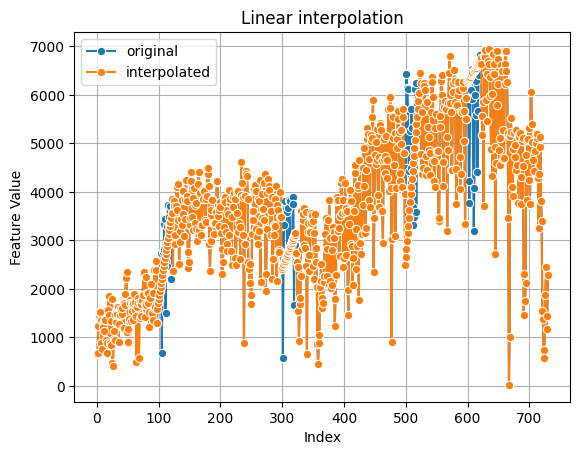

In [64]:
## 선형보간
df_linear = df_missing.copy()
df_linear['registered'] = df_linear['registered'].interpolate(method='linear')

sns.lineplot(data=df_registered['registered'], label='original', marker='o')
sns.lineplot(data=df_linear['registered'], label='interpolated', marker='o')

plt.title('Linear interpolation')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.grid(True)
plt.show()

## 느낌상, 랜덤 Missing Value가 아니라 연속적으로 20개씩 빠져있어서, linear만으로는 월화수목금토일의 패턴을 파악할 수 없었던 것 같다.

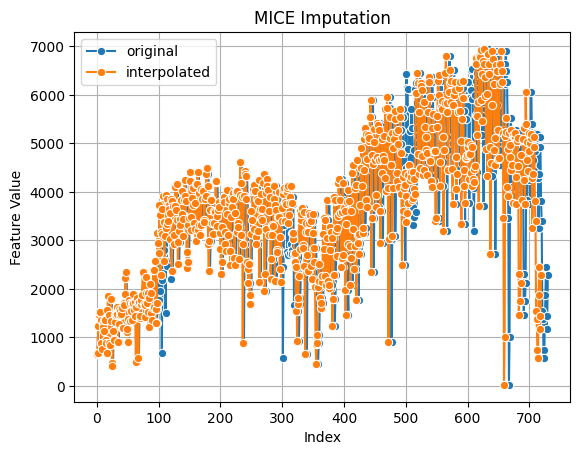

In [70]:
## MICE
features = ['registered', 'weathersit', 'weekday', 'mnth', 'temp', 'atemp', 'windspeed']
df_mice = df_missing[features].copy()

df_mice = pd.DataFrame(IterativeImputer(random_state=42).fit_transform(df_mice), columns = features)

sns.lineplot(data=df_registered['registered'], label='original', marker='o')
sns.lineplot(data=df_mice['registered'], label='interpolated', marker='o')

plt.title('MICE Imputation')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.grid(True)
plt.show()

In [78]:
## 실제 값과 결측치를 대치한 값을 비교한다.
nan_idx = df_missing[df_missing['registered'].isnull()].index

In [79]:
from sklearn.metrics import mean_absolute_error

mae_linear = mean_absolute_error(
    df_registered.loc[nan_idx, 'registered'],
    df_linear.loc[nan_idx, 'registered']
)

mae_mice = mean_absolute_error(
    df_registered.loc[nan_idx, 'registered'],
    df_mice.loc[nan_idx, 'registered']
)

print(f"Linear MAE: {mae_linear:.2f}")
print(f"MICE MAE: {mae_mice:.2f}")


Linear MAE: 850.25
MICE MAE: 982.69


선형 보간이 MICE 방식보다 더 낮은 MAE를 기록하였다.

registered의 평균값이 약 3600명인 것을 기준으로 보았을 때,
선형보간은 평균적으로 약 23.6%의 오차,
MICE는 약 27.3%의 오차를 보였다.

이는 두 방식 모두 일정 수준 이상의 오차를 가지며, 오히려 MICE가 성능이 낮았다는 점이 인상적이다.

-> 통째로 Missing Value로 만들었을 때 복원하기가 어려운 것을 알 수 있다.

### **개선시도 : registered는 주중/주말, 계절 등에 영향을 받으므로, 요일을 나누어서 예측을 해보도록 하겠다.**

In [82]:
features = ['registered', 'weathersit', 'weekday', 'mnth', 'temp', 'atemp', 'windspeed'] # MICE에 사용할 피처들

imputer = IterativeImputer(random_state=42)
df_mice_split = df_missing.copy()

## MICE
for day in df_mice_split['weekday'].unique():
    # 해당 요일만 필터링합니다.
    day_mask = df_mice_split['weekday'] == day # 해당 요일의 idx만을 저장합니다.
    df_day = df_mice_split.loc[day_mask, features] # 요일의 데이터만 따로 떼어서 df_day를 만듭니다.

    # 결측치 보간
    df_day_imputed = imputer.fit_transform(df_day)

    # 보간한 결과를 원본의 NaN값에 대체합니다.
    df_mice_split.loc[day_mask, 'registered'] = df_day_imputed[:, 0]  # 첫 열이 registered

df_split_interp = df_missing.copy()

## Linear
for day in df_split_interp['weekday'].unique():
    mask = df_split_interp['weekday'] == day
    df_split_interp.loc[mask, 'registered'] = df_split_interp.loc[mask, 'registered'].interpolate()

In [84]:
nan_idx = df_missing[df_missing['registered'].isnull()].index

# 원래 값
y_true = df_registered.loc[nan_idx, 'registered']

# MICE (요일별 적용 결과)
y_pred_mice_split = df_mice_split.loc[nan_idx, 'registered']

# 선형 보간 (요일별 적용 결과)
y_pred_linear_split = df_split_interp.loc[nan_idx, 'registered']

# MAE 계산
mae_mice_split = mean_absolute_error(y_true, y_pred_mice_split)
mae_linear_split = mean_absolute_error(y_true, y_pred_linear_split)



print(f"개선 전 MICE MAE: {mae_mice:.2f}")
print(f"개선 후 요일별 MICE:   {mae_mice_split:.2f}")
print(f"개선 전 Linear MAE: {mae_linear:.2f}")
print(f"개선 후 요일별 Linear: {mae_linear_split:.2f}")

개선 전 MICE MAE: 982.69
개선 후 요일별 MICE:   918.71
개선 전 Linear MAE: 850.25
개선 후 요일별 Linear: 636.60


### **개선 결과**

요일별로 데이터를 분리하여 보간을 수행한 결과, 전체 데이터에 대해 보간을 적용했을 때보다 성능이 향상된 것을 확인할 수 있었다.

- 각각 상대오차가 MICE는 25%로 감소하고, Linear는 17%로 감소하였다.
- 이는 `registered` 변수의 값이 요일에 따라 일정한 패턴을 보이기 때문으로 판단된다.


- MICE의 경우, 사용한 feature들이 registered 열과의 관계가 강하지 않았을 수 있다.

- 반면 선형 보간은 요일 내에서의 시간적인 흐름을 그대로 반영하여 오히려 더 단순하지만 효과적인 복원이 이루어진 것을 보인다. 요일에 따라 선형적으로 증가하다가 감소하는 추세이므로, 더 좋은 성능을 보인 것으로 판단된다.